# Task 4.2 - Keyword Analysis

### Steps

0. Preliminary Steps: Construct & Import Corpus
1. Process Tokens
2. Keyword Analysis
3. Latent Topic Analysis

# Import libraries & corpus

In [2]:
import pandas as pd
import os
import pickle

In [3]:
# corpus path
corpus_path = "corpus/"

In [4]:
# corpus index file name
corpus_index_filename = "corpus index.xlsx"

In [7]:
# pickled tokens file name
pickled_tokens_filename = "doc_tokens_processed.pkl"

In [8]:
# import corpus index
corpus_index = pd.read_excel(corpus_index_filename, header=0)
corpus_index.shape

(3, 3)

In [9]:
corpus_index[0:2]

,Filename,Date,Description
0,20220720,2022.07.20,Public Officials Visit Remand Prisons to Culti...
1,20220715,2022.07.15,Kazakh National Security Committee Celebrates ...


In [15]:
# import pickled doc_tokens_processed
pickled_file = open(pickled_tokens_filename,'rb')
pickled_stuff = pickle.load(pickled_file)

# recall stuff_to_pickle = [doc_ids,doc_text,doc_tokens_processed]
doc_ids = pickled_stuff[0]
doc_text = pickled_stuff[1]
doc_tokens_processed = pickled_stuff[2]

In [16]:
doc_ids

['20220411', '20220715', '20220720']

In [17]:
doc_text[0]

'US Ready to Partner With Kazakh Government on Implementation of Political Reforms, Senior Diplomat Says on Visit to KazakhstanThe United States supports President Tokayev’s political reforms agenda, said Uzra Zeya, Under-Secretary for Civilian Security, Democracy, and Human Rights, at the press meeting at the Kazakh Ministry of Foreign Affairs on April 11.Uzra Zeya meeting with Minister of Foreign Affairs – Mukhtar Tileuberdi. Photo credit: gov.kzDuring her visit to Kazakhstan, the sides discussed a wide range of issues, including the aftermath of the January unrest, combating human trafficking, empowerment of women, the rights of people with disabilities, and cooperation in security, law enforcement and anti-corruption.Zeya said that the U.S. government welcomed  President Kassym-Jomart Tokayev’s political reforms that he announced during his address to the nation on March 16, including those designed to strengthen the legislative branch of authority and political parties, and enhanc

In [19]:
len(doc_tokens_processed[0])

245

# 2. Keyword Analysis

reference: http://damir.cavar.me/pynotebooks/Python_NLTK_Texts_and_Frequencies.html

In [75]:
# pip install nltk

In [76]:
import nltk
from nltk import FreqDist

In [77]:
# generate the frequency distribution of the tokens
freqdist = nltk.FreqDist(tokens)
len(freqdist)

3154

In [78]:
freqdist

FreqDist({'macb': 137, 'haue': 122, 'thou': 90, 'enter': 81, 'shall': 68, 'come': 67, 'macbeth': 66, 'king': 66, 'vpon': 62, 'thee': 61, ...})

In [80]:
for x in freqdist:
    print(x, freqdist[x])

macb 137
haue 122
thou 90
enter 81
shall 68
come 67
macbeth 66
king 66
vpon 62
thee 61
macd 58
yet 57
thy 56
would 53
hath 52
time 50
good 49
rosse 49
lady 48
lord 46
make 45
like 43
night 43
st 42
let 42
say 41
banquo 39
man 38
doe 38
ti 37
1 36
must 36
done 35
hand 35
selfe 35
ile 35
know 35
may 35
feare 35
one 35
wife 34
well 33
thane 31
thing 31
great 31
see 31
exeunt 30
speake 29
sir 29
lenox 28
) 27
( 26
nature 26
mine 26
vp 26
heere 26
mal 25
thought 25
looke 24
giue 24
banq 24
blood 24
eye 23
sleepe 23
take 23
2 22
scena 22
againe 21
cawdor 21
death 21
life 21
heart 21
la 21
3 20
till 20
doct 20
call 19
art 19
men 19
& 19
day 19
loue 19
go 19
still 19
shew 18
woman 18
ha 18
heare 18
father 18
macduffe 18
within 17
god 17
though 17
way 17
owne 17
put 17
sey 17
worthy 16
cry 16
word 16
honor 16
strange 16
stand 16
nothing 16
euery 16
knock 16
face 16
poore 16
could 16
deed 16
dare 16
son 16
ere 15
ayre 15
bloody 15
friend 15
name 15
goe 15
downe 15
lye 15
heauen 15
borne 15
sword

In [81]:
# add unwanted tokens to stop list and re-run task 2:
# ', :, ;, -, vp, 

In [82]:
freqdist_tuples = [(x,freqdist[x]) for x in freqdist]
len(freqdist_tuples)

3154

In [83]:
freqdist_tuples

[('macb', 137),
 ('haue', 122),
 ('thou', 90),
 ('enter', 81),
 ('shall', 68),
 ('come', 67),
 ('macbeth', 66),
 ('king', 66),
 ('vpon', 62),
 ('thee', 61),
 ('macd', 58),
 ('yet', 57),
 ('thy', 56),
 ('would', 53),
 ('hath', 52),
 ('time', 50),
 ('good', 49),
 ('rosse', 49),
 ('lady', 48),
 ('lord', 46),
 ('make', 45),
 ('like', 43),
 ('night', 43),
 ('st', 42),
 ('let', 42),
 ('say', 41),
 ('banquo', 39),
 ('man', 38),
 ('doe', 38),
 ('ti', 37),
 ('1', 36),
 ('must', 36),
 ('done', 35),
 ('hand', 35),
 ('selfe', 35),
 ('ile', 35),
 ('know', 35),
 ('may', 35),
 ('feare', 35),
 ('one', 35),
 ('wife', 34),
 ('well', 33),
 ('thane', 31),
 ('thing', 31),
 ('great', 31),
 ('see', 31),
 ('exeunt', 30),
 ('speake', 29),
 ('sir', 29),
 ('lenox', 28),
 (')', 27),
 ('(', 26),
 ('nature', 26),
 ('mine', 26),
 ('vp', 26),
 ('heere', 26),
 ('mal', 25),
 ('thought', 25),
 ('looke', 24),
 ('giue', 24),
 ('banq', 24),
 ('blood', 24),
 ('eye', 23),
 ('sleepe', 23),
 ('take', 23),
 ('2', 22),
 ('scena'

In [84]:
# sort tuples by token frequency
freqdist_tuples.sort(key = lambda x: (-x[1],x[0]),reverse=False)

In [85]:
freqdist_tuples

[('macb', 137),
 ('haue', 122),
 ('thou', 90),
 ('enter', 81),
 ('shall', 68),
 ('come', 67),
 ('king', 66),
 ('macbeth', 66),
 ('vpon', 62),
 ('thee', 61),
 ('macd', 58),
 ('yet', 57),
 ('thy', 56),
 ('would', 53),
 ('hath', 52),
 ('time', 50),
 ('good', 49),
 ('rosse', 49),
 ('lady', 48),
 ('lord', 46),
 ('make', 45),
 ('like', 43),
 ('night', 43),
 ('let', 42),
 ('st', 42),
 ('say', 41),
 ('banquo', 39),
 ('doe', 38),
 ('man', 38),
 ('ti', 37),
 ('1', 36),
 ('must', 36),
 ('done', 35),
 ('feare', 35),
 ('hand', 35),
 ('ile', 35),
 ('know', 35),
 ('may', 35),
 ('one', 35),
 ('selfe', 35),
 ('wife', 34),
 ('well', 33),
 ('great', 31),
 ('see', 31),
 ('thane', 31),
 ('thing', 31),
 ('exeunt', 30),
 ('sir', 29),
 ('speake', 29),
 ('lenox', 28),
 (')', 27),
 ('(', 26),
 ('heere', 26),
 ('mine', 26),
 ('nature', 26),
 ('vp', 26),
 ('mal', 25),
 ('thought', 25),
 ('banq', 24),
 ('blood', 24),
 ('giue', 24),
 ('looke', 24),
 ('eye', 23),
 ('sleepe', 23),
 ('take', 23),
 ('2', 22),
 ('scena'

# Step 3. Visualize Top 25 Keywords in a Barplot

In [86]:
top25 = freqdist_tuples[0:25]
top25

[('macb', 137),
 ('haue', 122),
 ('thou', 90),
 ('enter', 81),
 ('shall', 68),
 ('come', 67),
 ('king', 66),
 ('macbeth', 66),
 ('vpon', 62),
 ('thee', 61),
 ('macd', 58),
 ('yet', 57),
 ('thy', 56),
 ('would', 53),
 ('hath', 52),
 ('time', 50),
 ('good', 49),
 ('rosse', 49),
 ('lady', 48),
 ('lord', 46),
 ('make', 45),
 ('like', 43),
 ('night', 43),
 ('let', 42),
 ('st', 42)]

In [87]:
top25_tokens = [x[0] for x in top25]
top25_counts = [x[1] for x in top25]

In [88]:
top25_tokens

['macb',
 'haue',
 'thou',
 'enter',
 'shall',
 'come',
 'king',
 'macbeth',
 'vpon',
 'thee',
 'macd',
 'yet',
 'thy',
 'would',
 'hath',
 'time',
 'good',
 'rosse',
 'lady',
 'lord',
 'make',
 'like',
 'night',
 'let',
 'st']

In [89]:
top25_counts

[137,
 122,
 90,
 81,
 68,
 67,
 66,
 66,
 62,
 61,
 58,
 57,
 56,
 53,
 52,
 50,
 49,
 49,
 48,
 46,
 45,
 43,
 43,
 42,
 42]

In [90]:
# pip install numpy

In [91]:
# pip install matplotlib

In [92]:
import numpy as np
import matplotlib.pyplot as plt

In [93]:
fig = plt.figure(figsize = (10, 5))

<Figure size 1000x500 with 0 Axes>

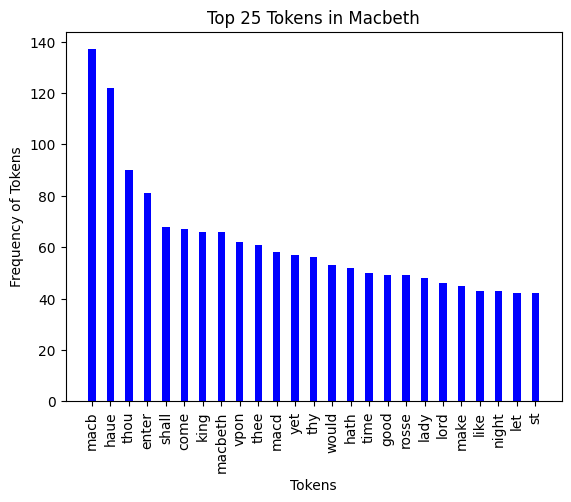

In [94]:
# creating the bar plot
plt.bar(top25_tokens, top25_counts, color ='blue', width = 0.4)
 
plt.xlabel("Tokens")
plt.xticks(rotation=90)
plt.ylabel("Frequency of Tokens")
plt.title("Top 25 Tokens in "+docname.capitalize())

# save the plot before showing
plt.savefig("../results/task3_top25_barplot_"+docname+".png",dpi=400)

plt.show()

# Step 4. Visualize top 25 keywords in a word cloud

Python's wordcloud - https://www.datacamp.com/tutorial/wordcloud-python (requires Microsoft C++ Virtual)

Web-based app - https://www.wordclouds.com/

In [95]:
# pip install wordcloud

In [96]:
# from PIL import Image
# from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [97]:
import pandas as pd

In [98]:
# weight: top25_counts

In [99]:
# word: top25_tokens

In [100]:
# create color column

HEX color codes - https://htmlcolorcodes.com/

In [101]:
# choose some colors for the word cloud
purple = "#7D3C98".lower()
gold = "#F4D03F".lower()

In [102]:
# list of color hex codes. make sure it contains exacly 25 items 
top25_colors = [purple,gold] * 12 + [purple]
top25_colors

['#7d3c98',
 '#f4d03f',
 '#7d3c98',
 '#f4d03f',
 '#7d3c98',
 '#f4d03f',
 '#7d3c98',
 '#f4d03f',
 '#7d3c98',
 '#f4d03f',
 '#7d3c98',
 '#f4d03f',
 '#7d3c98',
 '#f4d03f',
 '#7d3c98',
 '#f4d03f',
 '#7d3c98',
 '#f4d03f',
 '#7d3c98',
 '#f4d03f',
 '#7d3c98',
 '#f4d03f',
 '#7d3c98',
 '#f4d03f',
 '#7d3c98']

In [103]:
# list of 25 url's
# if you insert urls here, they will appear as hyperlinks in the wordcloud
# ours will be null

top25_url = [""] * 25
top25_url

['',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '']

In [104]:
dat = pd.DataFrame({"weight":top25_counts,"word":top25_tokens,"color":top25_colors,"url":top25_url})

In [105]:
dat

,weight,word,color,url
0,137,macb,#7d3c98,
1,122,haue,#f4d03f,
2,90,thou,#7d3c98,
3,81,enter,#f4d03f,
4,68,shall,#7d3c98,
5,67,come,#f4d03f,
6,66,king,#7d3c98,
7,66,macbeth,#f4d03f,
8,62,vpon,#7d3c98,
9,61,thee,#f4d03f,


In [106]:
dat.dtypes

weight     int64
word      object
color     object
url       object
dtype: object

In [107]:
dat.to_csv("../results/task3_wordcloud_data_"+docname+".csv",index=False)

https://www.wordclouds.com/

# Bonus Tasks (Optional)

- In the barplots and wordclouds for each document, highlight (color) words which appear in the top 25 of both documents

- Combine the tokens of the two documents. Create one combined barplot and one combined wordcloud. Color-code tokens according to:
 - Document #1 only
 - Document #2 only
 - Both documents